In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy import sparse
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# import data

In [2]:
# path and alias
FILE_PATH = "data/post/"
file_name = "Electronics"

In [3]:
# read data in pickle format and convert to dataframe
df = pd.read_pickle(FILE_PATH+file_name+'.pkl')

In [4]:
df.head()

,user_id,parent_asin,rating
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B083NRGZMM,3
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B07N69T6TM,1
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B01G8JO5F2,5
3,AGGZ357AO26RQZVRLGU4D4N52DZQ,B001OC5JKY,5
4,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,B07CJYMRWM,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43886944 entries, 0 to 43886943
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   parent_asin  object
 2   rating       int64 
dtypes: int64(1), object(2)
memory usage: 1004.5+ MB


<Axes: xlabel='rating'>

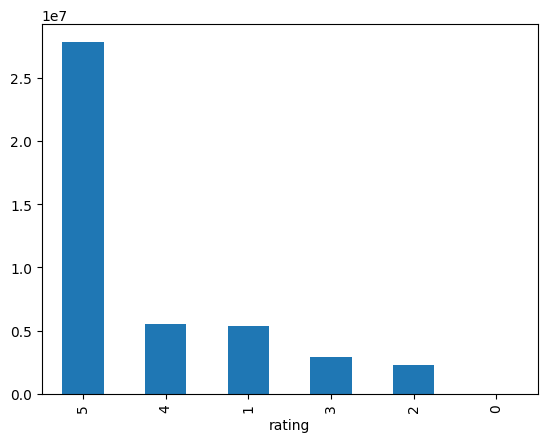

In [6]:
# distribution of ratings
df['rating'].value_counts().plot(kind='bar')

# choose random sample

In [7]:
df1 = df.sample(frac=0.01)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438869 entries, 2597919 to 9927087
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      438869 non-null  object
 1   parent_asin  438869 non-null  object
 2   rating       438869 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.4+ MB


# matrix of rating

In [9]:
# create matrix of rating with sparse matrix CSR
users = df1["user_id"].unique()
products = df1["parent_asin"].unique()
shape = (len(users), len(products))

# Create indices for users and products
user_cat = pd.CategoricalDtype(categories=sorted(users), ordered=True)
product_cat = pd.CategoricalDtype(categories=sorted(products), ordered=True)
user_index = df1["user_id"].astype(user_cat).cat.codes
product_index = df1["parent_asin"].astype(product_cat).cat.codes

# Conversion via COO matrix
coo = sparse.coo_matrix((df1["rating"], (user_index, product_index)), shape=shape)
csr = coo.tocsr()

# K-means

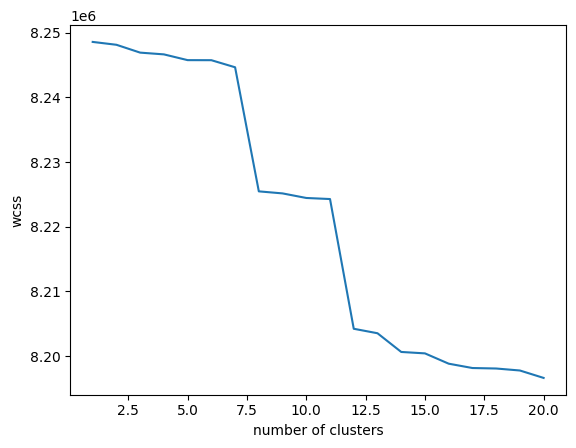

In [10]:
wcss = []
max_clusters = 20

for num_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit(csr)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

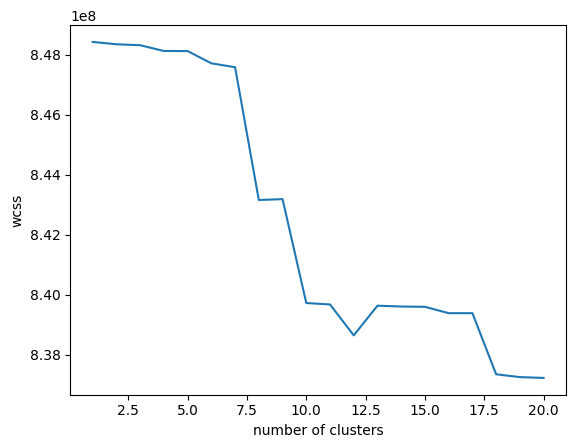

In [10]:
wcss = []
max_clusters = 20

for num_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit(csr)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [11]:
# Range of K values to explore (adjust as needed)
range_k = range(2, 6)

silhouette_averages = []
for k in range_k:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(csr)

    # Compute the average Silhouette score for this k value
    silhouette_average = silhouette_score(csr, kmeans.labels_)
    silhouette_averages.append(silhouette_average)

plt.plot(range_k, silhouette_averages)
plt.show()

KeyboardInterrupt: 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

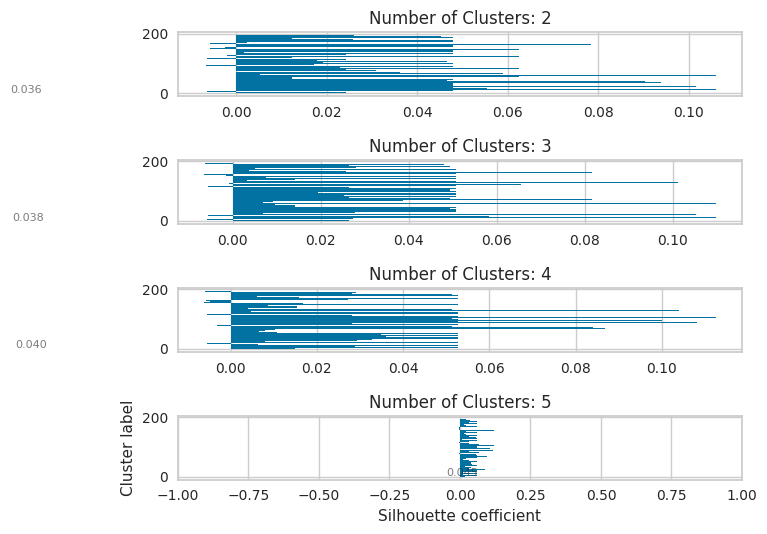

In [20]:
# Range of K values to explore (adjust as needed)
range_k = range(2, 6)

silhouette_averages = []
for k in range_k:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(csr)

    # Compute the Silhouette scores for each sample
    silhouette_values = silhouette_samples(csr, kmeans.labels_)

    # Plot the Silhouette analysis for this k value
    plt.subplot(len(range_k), 1, k - range_k[0] + 1)
    plt.barh(range(csr.shape[0]), silhouette_values, height=1)
    plt.title(f"Number of Clusters: {k}")

    # Compute the average Silhouette score for this k value
    silhouette_average = silhouette_score(csr, kmeans.labels_)
    silhouette_averages.append(silhouette_average)

    # Print the average score and add a horizontal line to the plot
    plt.text(-0.05, k - range_k[0] + 0.5, f"{silhouette_average:.3f}", fontsize=8, alpha=0.6)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.xlim(-1, 1)  # Set limits for x-axis (Silhouette coefficient)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

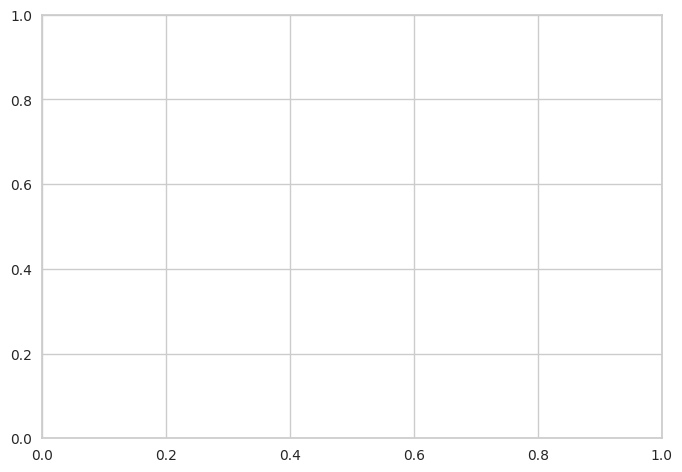

In [14]:
wcss = []
max_clusters = 5

for num_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(csr)
    labels = kmeans.labels_
    wcss.append(silhouette_score(csr, labels, metric = 'euclidean'))

plt.plot(range(1, max_clusters+1), wcss,'bx-')
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
# Apply k-means clustering
num_clusters = 60  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table)



In [20]:
# Example: Get recommendations for a given user
user_id = 1

# Get the cluster label for the given user
user_cluster_label = cluster_labels[user_id - 1]

# Get all users in the same cluster as the given user
users_in_same_cluster = pivot_table.index[cluster_labels == user_cluster_label]

# Get the average ratings of the users in the same cluster
average_ratings = pivot_table.loc[users_in_same_cluster].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Example: Get top-k recommendations
k = 5
top_k_recommendations = sorted_ratings.head(k)

# Print the top-k recommendations
print("Top", k, "recommendations for user", user_id, ":")
for product_id, rating in top_k_recommendations.items():
    print("Product ID:", product_id, "Rating:", rating)

Top 5 recommendations for user 1 :
Product ID: B081M5HPCD Rating: 5.0
Product ID: B08HFNNPPJ Rating: 5.0
Product ID: B0C6D5GYQ4 Rating: 4.0
Product ID: B07VTKFLBW Rating: 4.0
Product ID: B07H2CKXRH Rating: 4.0


# hierachical clustering

In [38]:
WSS = []
for i in range(5):
    cluster = AgglomerativeClustering(n_clusters= i+1, linkage='average')  
    cluster.fit_predict(pivot_table)
    # cluster index
    label = cluster.labels_
    wss = []
    for j in range(i+1):
        # extract each cluster according to its index
        idx = [t for t, e in enumerate(label) if e == j]
        cluster = pivot_table[idx,]
        # calculate the WSS:
        cluster_mean = cluster.mean(axis=0)
        distance = np.sum(np.abs(cluster - cluster_mean)**2,axis=-1)
        wss.append(sum(distance))
    WSS.append(sum(wss))

plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'mean'

In [25]:
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)

# Fit the clustering model to the data
clustering.fit(pivot_table)

# Get the cluster labels
labels = clustering.labels_



In [26]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])